In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import time

import warnings
warnings.filterwarnings('ignore')

np.random.seed(0)

In [2]:
train = pd.read_csv("data/train.csv")
X = np.array(train)
Y = np.array(np.array(train["Cover_Type"].tolist()))
n = X.shape[0]

shuffle = np.random.permutation(np.arange(n))
X, Y = X[shuffle], Y[shuffle]

percent_in_dev = .5
dev_slice = int(percent_in_dev * n)

# Set some variables to dev and training data.
dev_dat, dev_lab = X[:dev_slice], Y[:dev_slice]
train_dat, train_lab = X[dev_slice:], Y[dev_slice:]

n_dev = dev_dat.shape[0]
n_train = train_dat.shape[0]
n_feat = train_dat.shape[1]

def binarizeY(data):
    binarized_data = np.zeros((data.size,10))
    for j in range(0,data.size):
        feature = data[j:j+1]
        i = feature.astype(np.int64) 
        binarized_data[j,i]=1
    return binarized_data

train_lab_b = binarizeY(train_lab)
dev_lab_b = binarizeY(dev_lab)
n_class = train_lab_b[1].size

print(f'Dev size: {n_dev}')
print(f'Train size: {n_train}')
print(f'Features: {n_feat}')
print(f'Classes: {n_class}')
pd.DataFrame(train_dat).describe()

Dev size: 7560
Train size: 7560
Features: 56
Classes: 10


,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
count,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000,...,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000
mean,7512.846296,2745.308069,155.972487,16.490741,225.312963,50.509788,1695.730688,213.184259,219.071164,134.604101,...,0.044180,0.041931,0.001587,0.006746,0.000529,0.001587,0.048545,0.043122,0.027646,3.997884
std,4373.932541,414.726735,109.521537,8.443264,208.920799,61.090309,1309.663048,30.198756,22.739294,45.823751,...,0.205508,0.200445,0.039812,0.081862,0.022998,0.039812,0.214929,0.203144,0.163966,1.990517
min,1.000000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,59.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3707.250000,2374.000000,65.000000,10.000000,67.000000,5.000000,752.000000,197.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7493.500000,2747.000000,126.000000,15.000000,175.000000,32.000000,1295.500000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11286.000000,3097.000000,255.000000,22.000000,323.000000,77.000000,2236.750000,235.000000,236.000000,166.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15119.000000,3849.000000,360.000000,49.000000,1318.000000,554.000000,6836.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [3]:
train_dat = normalize(train_dat, axis=0, norm='max')
dev_dat = normalize(dev_dat, axis=0, norm='max')
pd.DataFrame(train_dat).describe()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
count,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000,...,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000
mean,0.496914,0.713252,0.433257,0.336546,0.170951,0.091173,0.248059,0.839308,0.862485,0.542758,...,0.044180,0.041931,0.001587,0.006746,0.000529,0.001587,0.048545,0.043122,0.027646,0.571126
std,0.289300,0.107749,0.304226,0.172312,0.158514,0.110271,0.191583,0.118893,0.089525,0.184773,...,0.205508,0.200445,0.039812,0.081862,0.022998,0.039812,0.214929,0.203144,0.163966,0.284360
min,0.000066,0.484022,0.000000,0.000000,0.000000,-0.263538,0.000000,0.232283,0.389764,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857
25%,0.245205,0.616784,0.180556,0.204082,0.050835,0.009025,0.110006,0.775591,0.814961,0.427419,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714
50%,0.495635,0.713692,0.350000,0.306122,0.132777,0.057762,0.189511,0.866142,0.877953,0.556452,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.571429
75%,0.746478,0.804625,0.708333,0.448980,0.245068,0.138989,0.327202,0.925197,0.929134,0.669355,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.857143
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

rf.fit(train_dat, train_lab)

rf_pred = rf.predict(dev_dat).astype(int)

,1,2,3,4,5,6,7,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0,0.999088,1.000000,0.999868,0.999870,0.999868
recall,1.0,1.0,1.0,1.0,1.0,1.000000,0.999083,0.999868,0.999869,0.999868
f1-score,1.0,1.0,1.0,1.0,1.0,0.999544,0.999541,0.999868,0.999869,0.999868
support,1095.0,1076.0,1090.0,1034.0,1078.0,1096.000000,1091.000000,0.999868,7560.000000,7560.000000


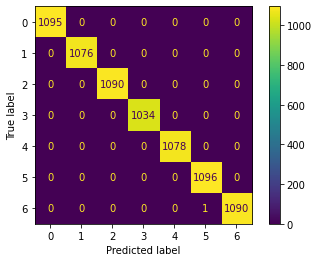

In [5]:
cm = confusion_matrix(dev_lab, rf_pred)

ConfusionMatrixDisplay(cm).plot()

pd.DataFrame(classification_report(dev_lab, rf_pred, output_dict=True))